In [1]:
# Seasonality and UHI Metrics

In [2]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

# Nature Climate Change aesthetic
sns.set_theme(
    context="notebook",
    style="whitegrid",
    font_scale=1.3
)

plt.rcParams.update({
    "figure.facecolor": "white",
    "axes.facecolor": "white",
    "axes.edgecolor": "0.2",
    "axes.linewidth": 1.2,
    "axes.grid": True,
    "grid.color": "0.85",
    "grid.linewidth": 1.0,
    "grid.alpha": 0.5,
    "axes.titleweight": "bold",
    "axes.titlesize": 18,
    "axes.labelsize": 14,
    "legend.frameon": False,
    "legend.fontsize": 12,
    "axes.spines.top": False,
    "axes.spines.right": False
})


In [3]:
palette_uhi = {
    "rural_interior": "#4C9F70",     # green – vegetation
    "rural_coastal":  "#7BC8A4",     # light green – water
    "urban_coastal":  "#3E5C9A",     # deep blue – coastal cities
    "urban_interior": "#A23E48"      # muted red – inland urban heat
}


In [4]:
palette_season = {
    "DJF": "#305F72",   # winter – deep cold blue
    "MAM": "#5FA8C5",   # spring – light blue
    "JJA": "#F2C14E",   # summer – soft warm yellow
    "SON": "#9E7B9B"    # autumn – muted purple
}


In [5]:
# Load Parquet file previously created 

df = pd.read_parquet("stations_daily_with_features.parquet")

# Keep only necessary columns
df = df[
    [
        "station_id", "name", "date", "season",
        "T_station", "T_ERA5", "error",
        "NDVI_mean", "urban_fraction", "env_class"
    ]
]

In [6]:
# Metrics BY SEASON computation

def rmse(x):
    return np.sqrt(np.mean(x**2))

season_metrics = df.groupby("season").agg(
    mean=("error", "mean"),
    std=("error", "std"),
    rmse=("error", rmse),
    p5=("error", lambda x: np.nanpercentile(x, 5)),
    p50=("error", lambda x: np.nanpercentile(x, 50)),
    p95=("error", lambda x: np.nanpercentile(x, 95)),
    n=("error", "count")
).reset_index()

season_metrics.to_csv("metrics_by_season.csv", index=False)

C:\Users\Administrador\AppData\Local\Temp\ipykernel_18676\1416306683.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Administrador\AppData\Local\Temp\ipykernel_18676\1416306683.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


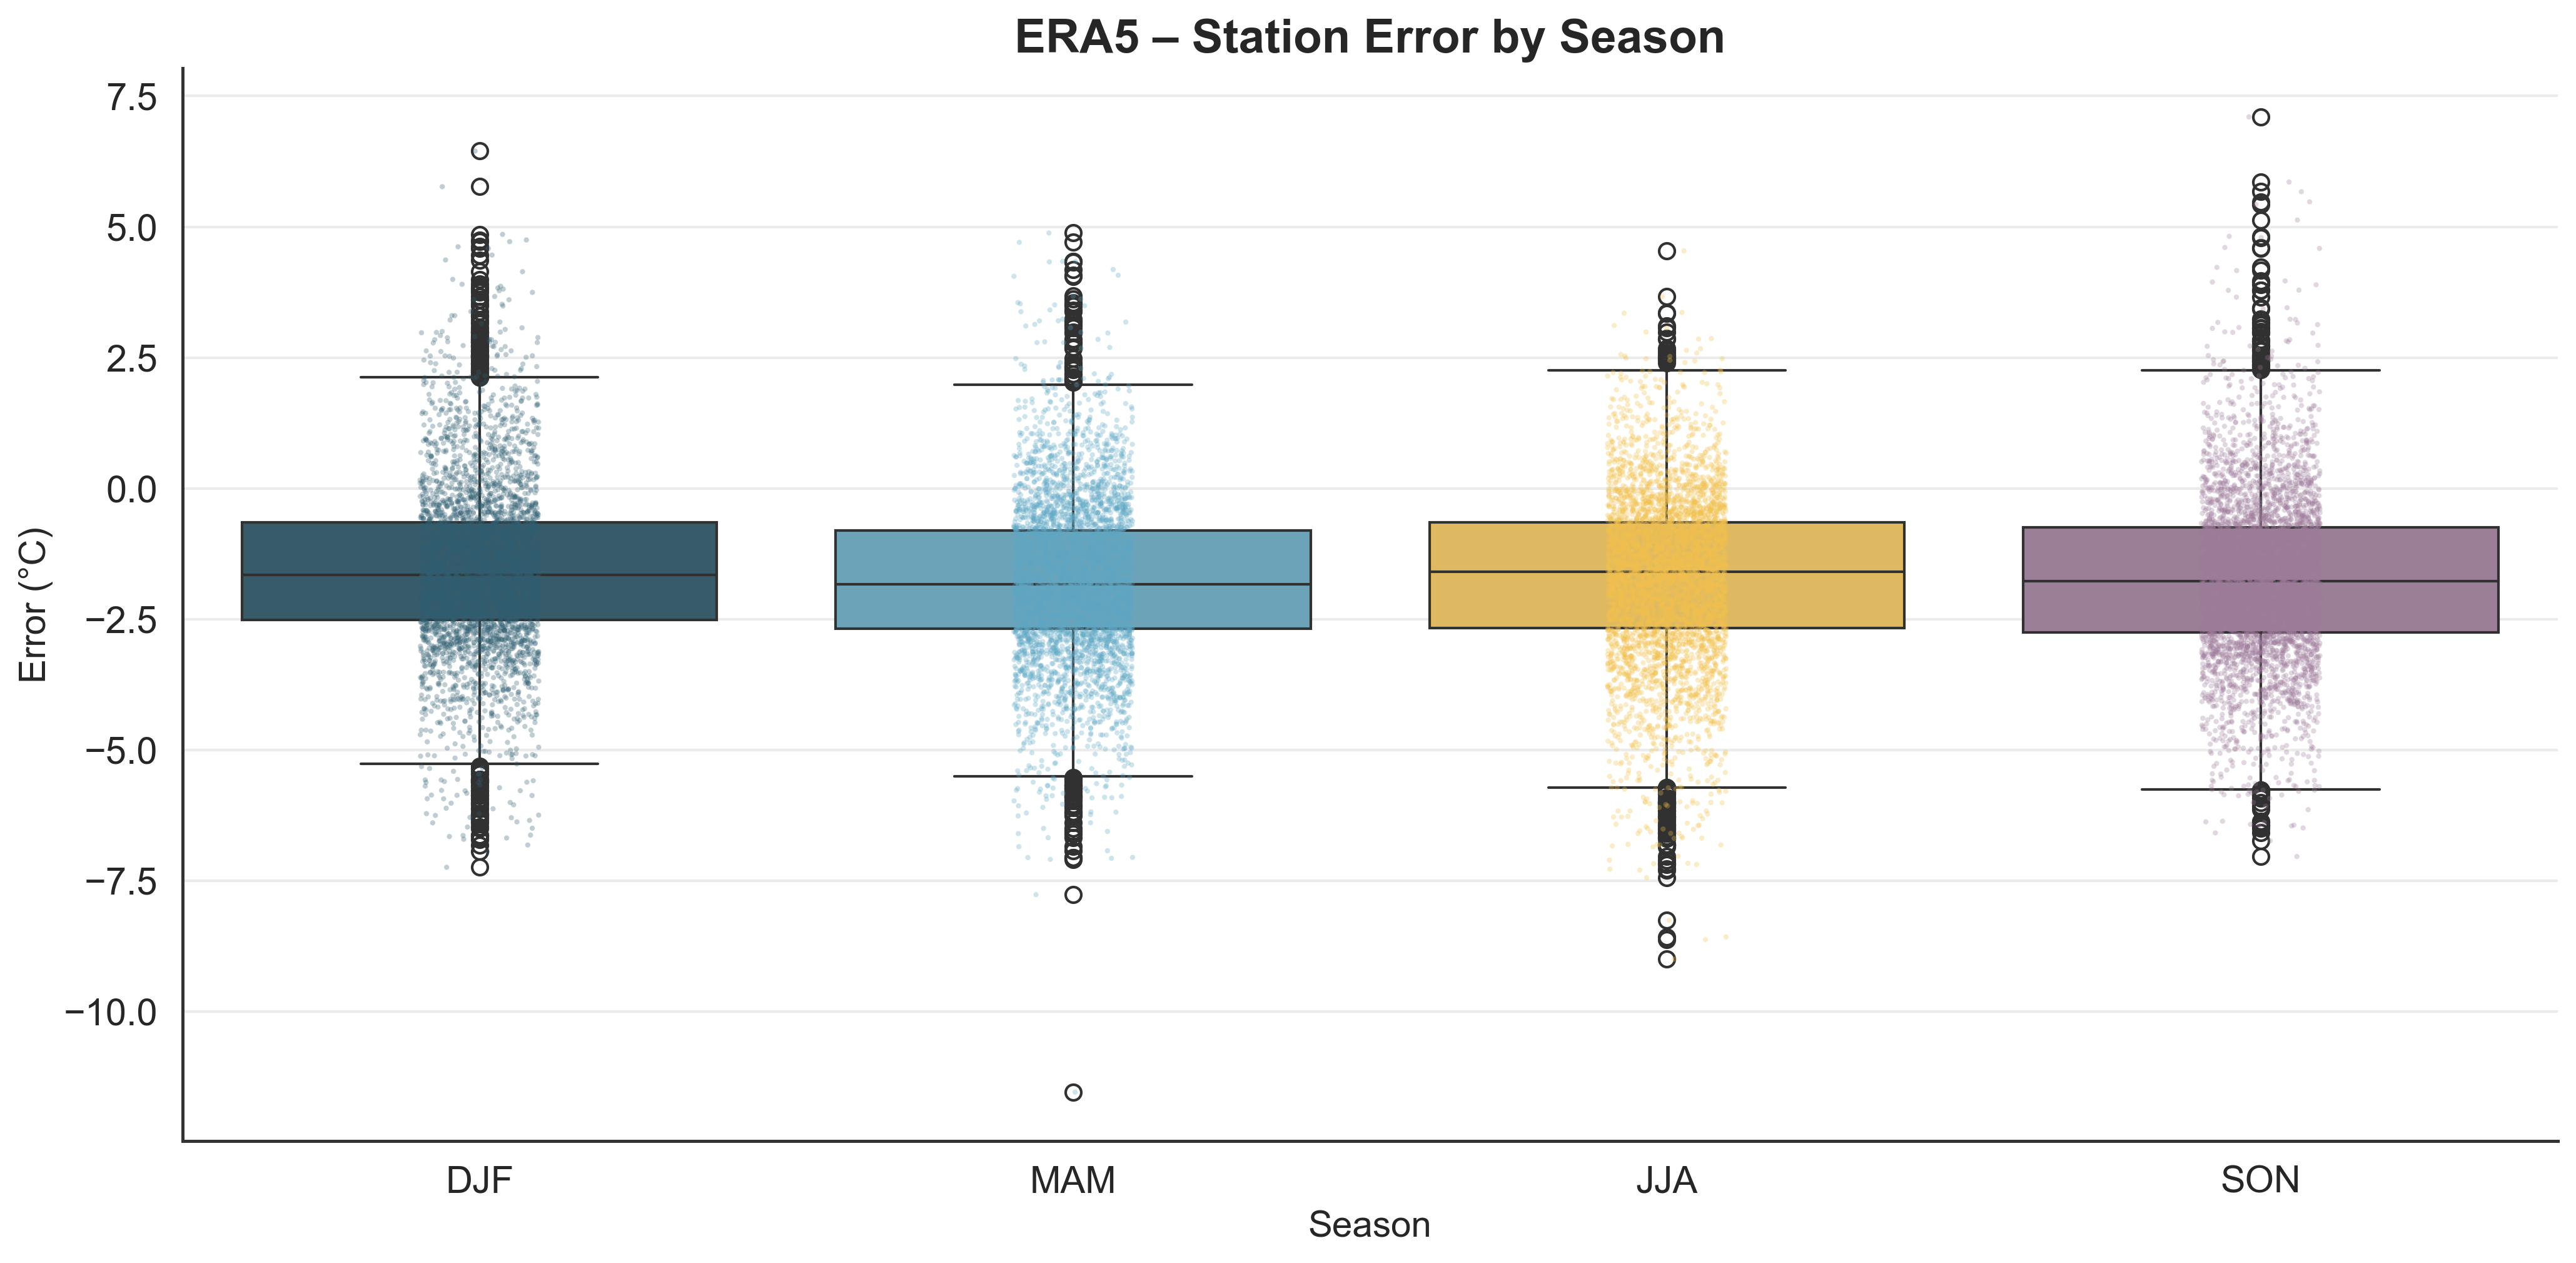

In [7]:
# Box plot the results obtained for the SEASON

plt.figure(figsize=(14,7), dpi=300)
sns.boxplot(
    data=df,
    x="season",
    y="error",
    order=["DJF","MAM","JJA","SON"],
    palette=palette_season
)
sns.stripplot(
    data=df,
    x="season",
    y="error",
    order=["DJF","MAM","JJA","SON"],
    palette=palette_season,
    size=2,
    alpha=0.3
)

plt.title("ERA5 – Station Error by Season", fontsize=18, weight="bold")
plt.xlabel("Season")
plt.ylabel("Error (°C)")

plt.tight_layout()
plt.savefig("error_by_season.png", dpi=300, bbox_inches="tight", facecolor="white")
plt.show()



In [8]:
# Metrics computed over UHI Class (named as env_class)

uhi_metrics = df.groupby("env_class").agg(
    mean=("error", "mean"),
    std=("error", "std"),
    rmse=("error", rmse),
    p10=("error", lambda x: np.nanpercentile(x, 10)),
    p50=("error", lambda x: np.nanpercentile(x, 50)),
    p90=("error", lambda x: np.nanpercentile(x, 90)),
    n=("error", "count")
).reset_index()


uhi_metrics.to_csv("metrics_by_UHI_class.csv", index=False)

C:\Users\Administrador\AppData\Local\Temp\ipykernel_18676\1733245759.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


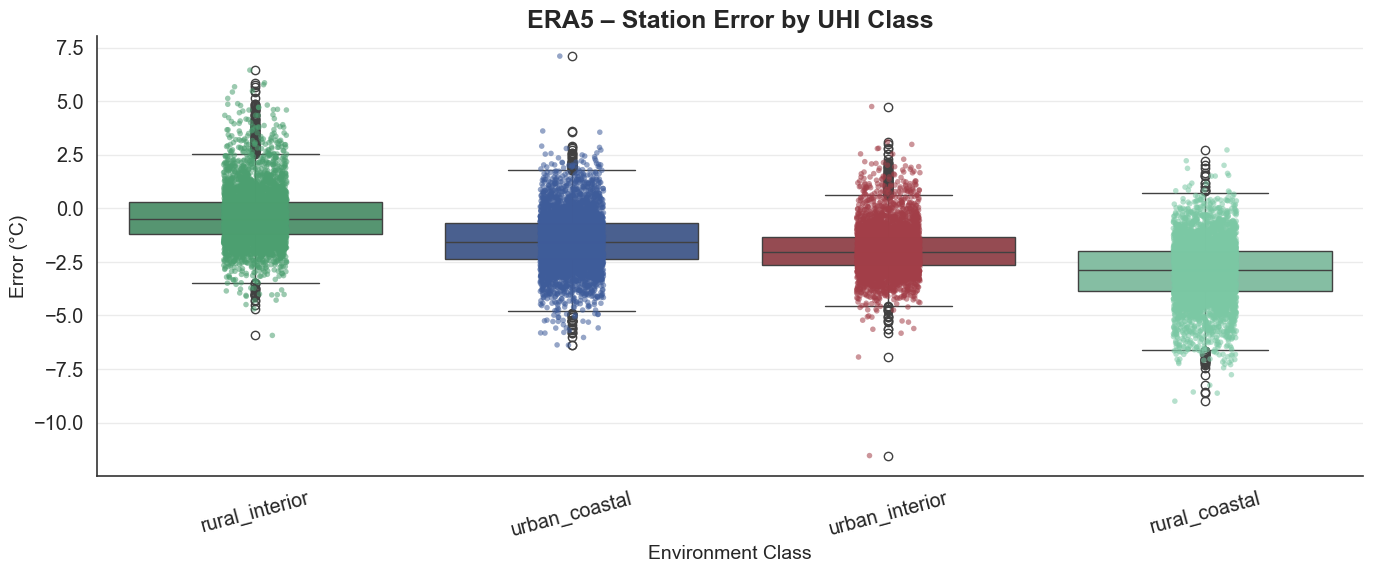

In [9]:
# Box plot the results obtained for the UHI

plt.figure(figsize=(14,6))
sns.boxplot(
    data=df,
    x="env_class",
    y="error",
    palette=palette_uhi
)
sns.stripplot(
    data=df,
    x="env_class",
    y="error",
    hue="env_class",
    palette=palette_uhi,
    dodge=False,
    size=4,
    alpha=0.55
)

plt.xticks(rotation=15)
plt.title("ERA5 – Station Error by UHI Class", fontsize=18, weight="bold")
plt.xlabel("Environment Class")
plt.ylabel("Error (°C)")

plt.tight_layout()
plt.savefig("error_by_uhi.png", dpi=300, bbox_inches="tight", facecolor="white")
plt.show()


In [10]:
# Aggregation of stations for Scatter PLot
# ------------------------------------------------------------
station_agg = df.groupby("station_id").agg(
    error_mean_station=("error", "mean"),
    NDVI_mean=("NDVI_mean", "mean"),
    urban_fraction=("urban_fraction", "mean"),
    env_class=("env_class", "first")
).reset_index()

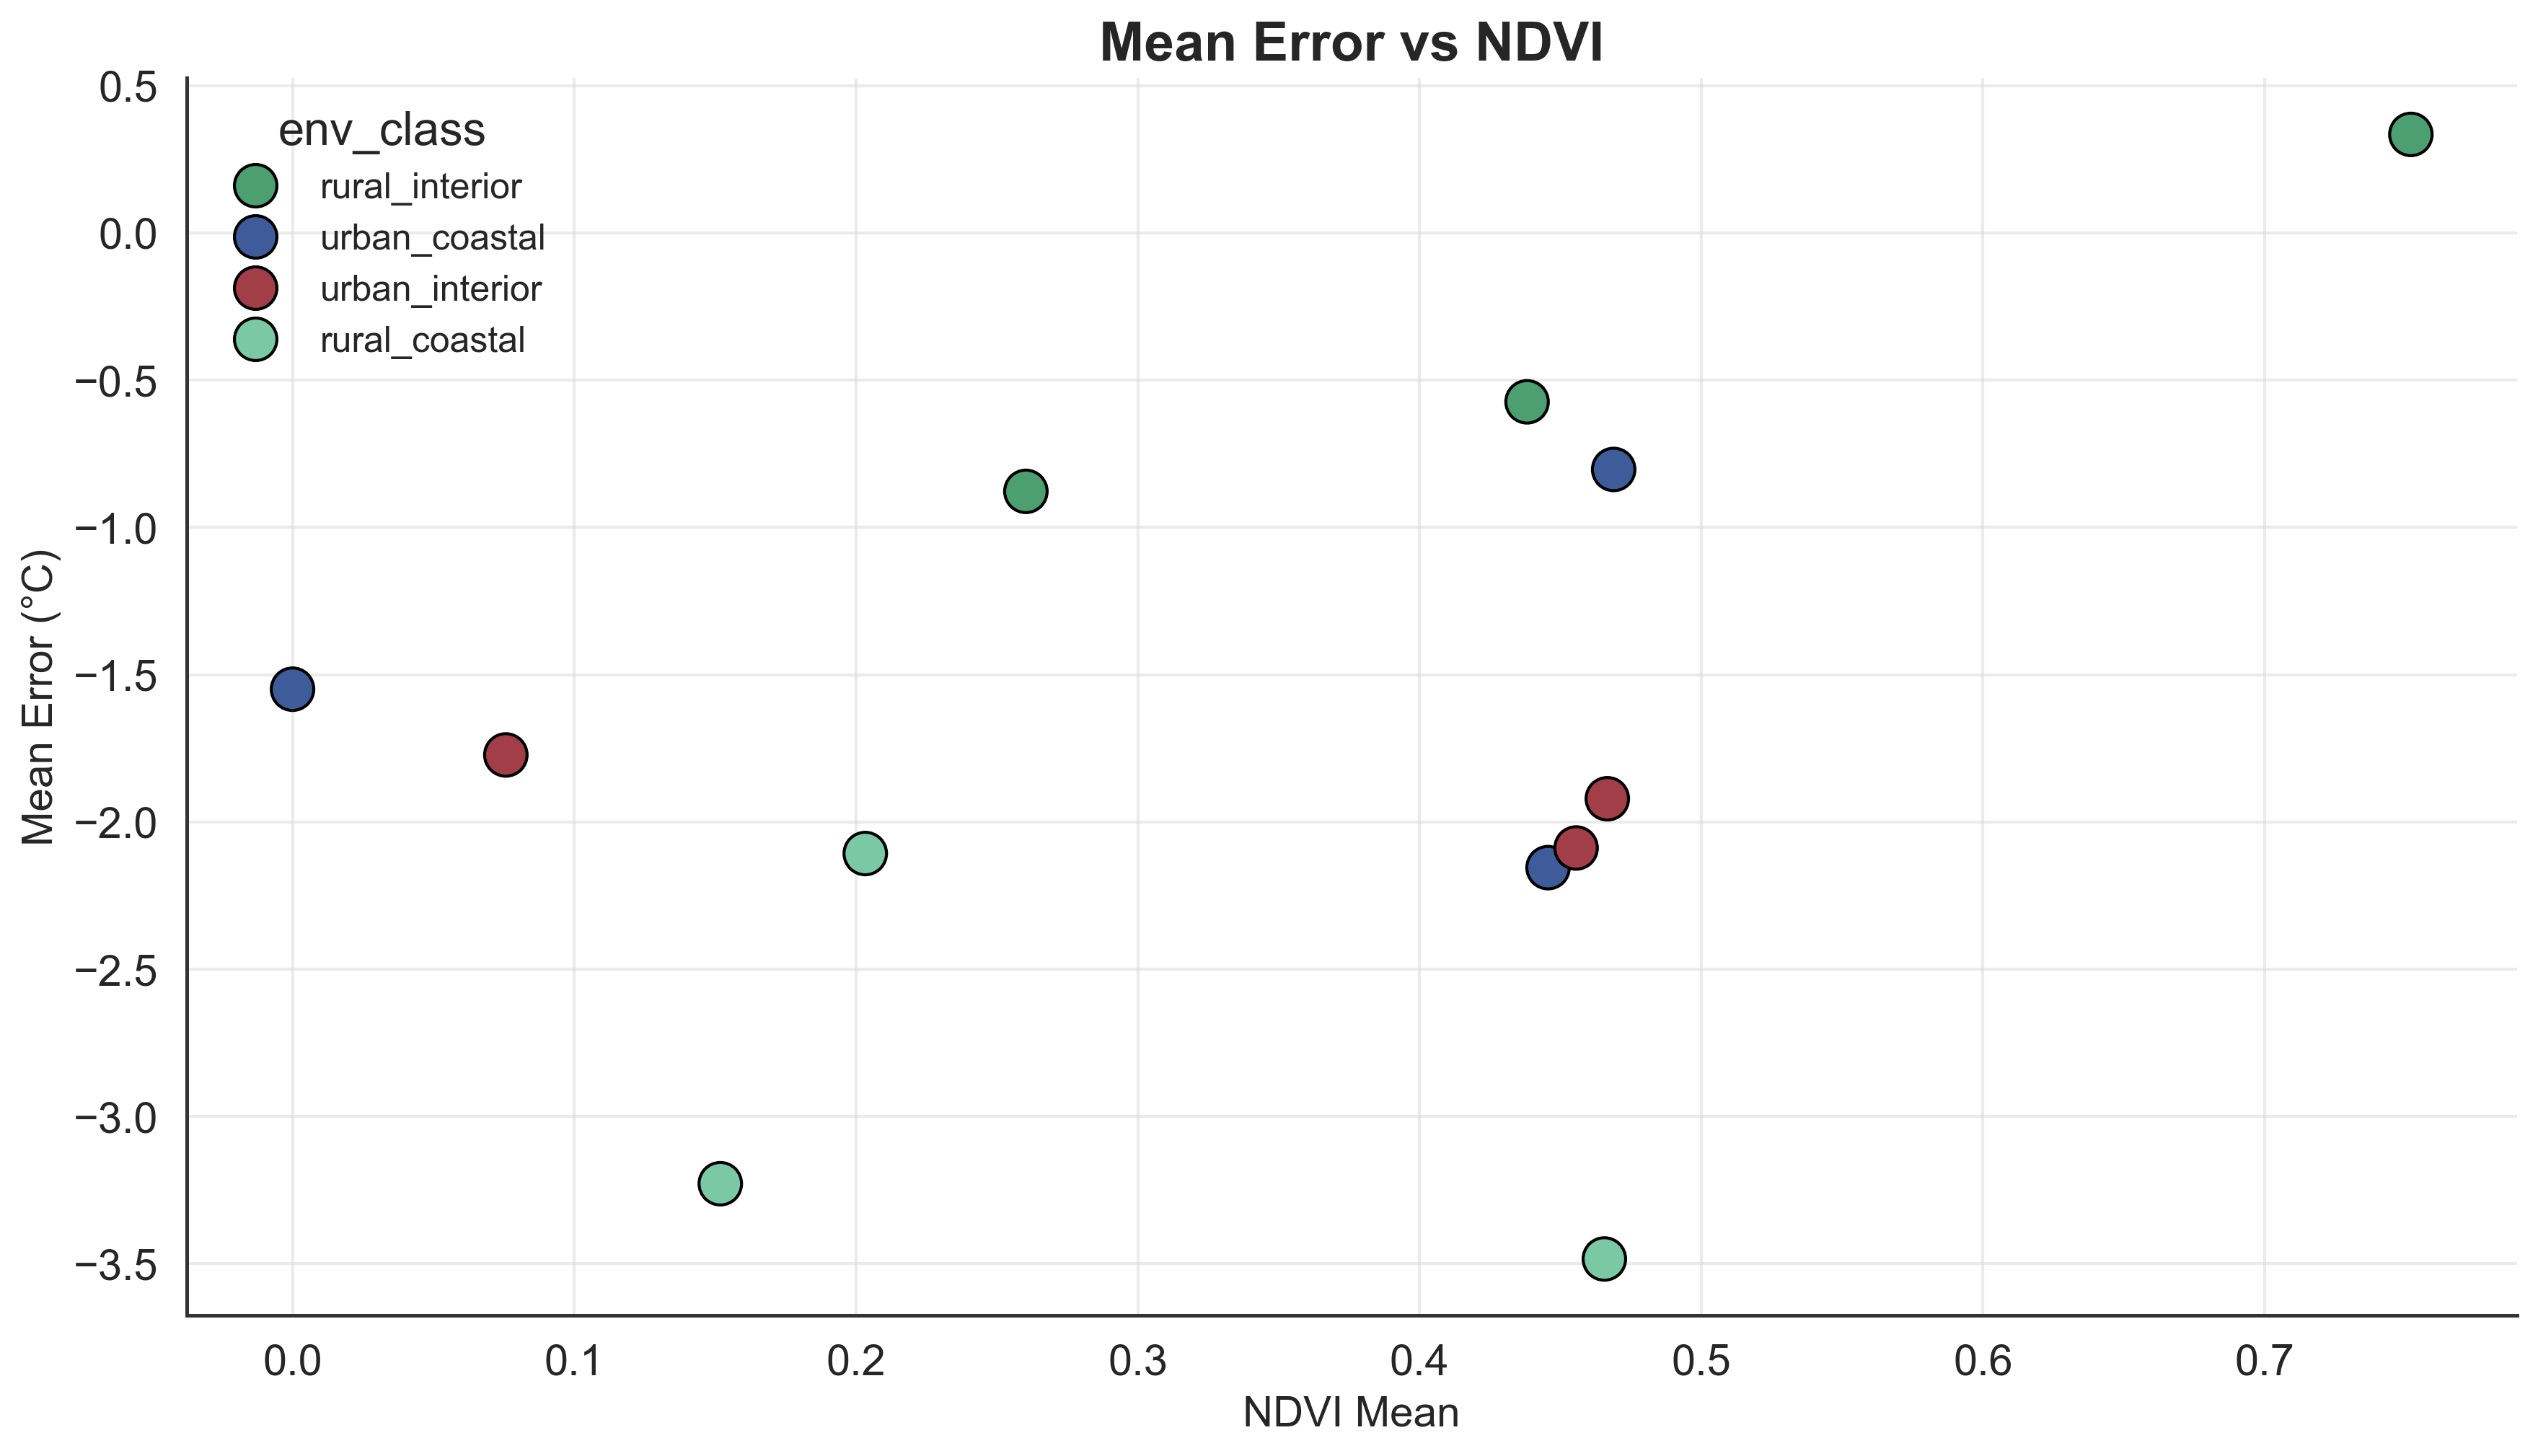

In [11]:
# Scatter: NDVI vs ERROR

plt.figure(figsize=(12,7), dpi=300)
sns.scatterplot(
    data=station_agg,
    x="NDVI_mean",
    y="error_mean_station",
    hue="env_class",
    palette=palette_uhi,
    s=200,
    edgecolor="black",
    linewidth=1
)

plt.title("Mean Error vs NDVI", fontsize=18, weight="bold")
plt.xlabel("NDVI Mean")
plt.ylabel("Mean Error (°C)")

plt.tight_layout()
plt.savefig("scatter_ndvi_error.png", dpi=300, bbox_inches="tight", facecolor="white")
plt.show()


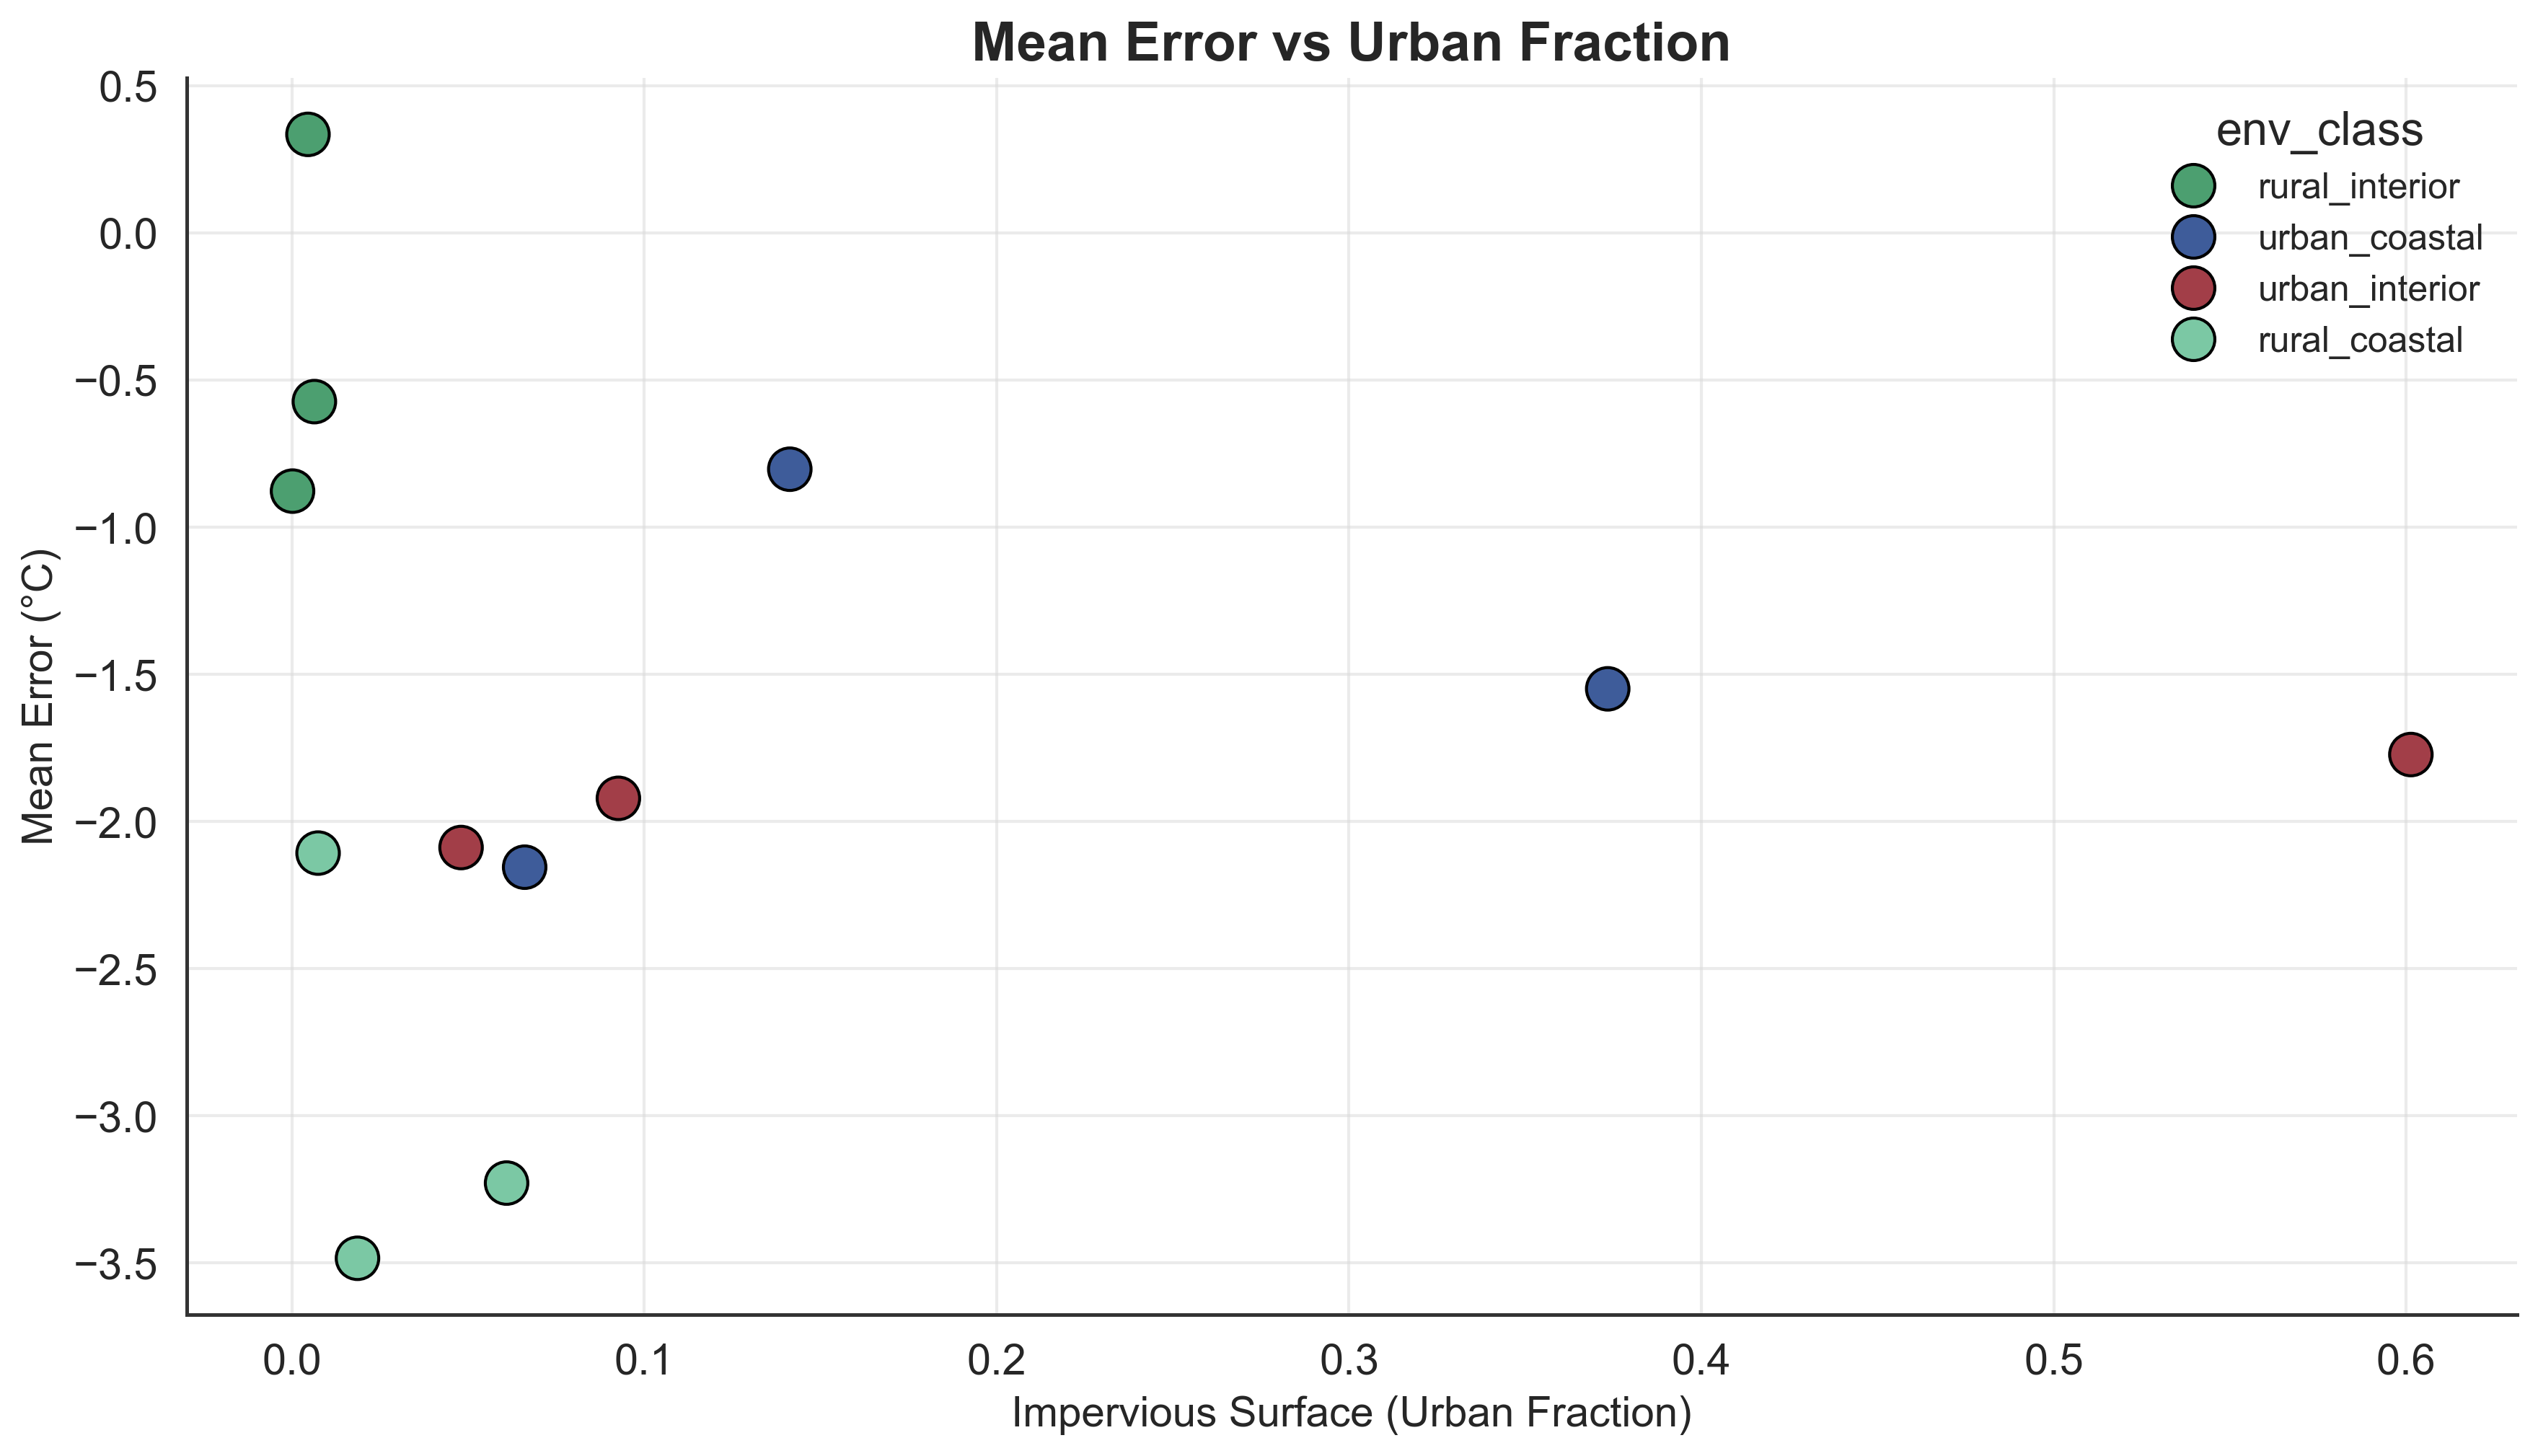

In [12]:
# Scatter: URBAN FRACTION vs ERROR

plt.figure(figsize=(12,7), dpi=300)
sns.scatterplot(
    data=station_agg,
    x="urban_fraction",
    y="error_mean_station",
    hue="env_class",
    palette=palette_uhi,
    s=200,
    edgecolor="black",
    linewidth=1
)

plt.title("Mean Error vs Urban Fraction", fontsize=18, weight="bold")
plt.xlabel("Impervious Surface (Urban Fraction)")
plt.ylabel("Mean Error (°C)")

plt.tight_layout()
plt.savefig("scatter_urbanfraction_error.png", dpi=300, bbox_inches="tight", facecolor="white")
plt.show()


In [13]:
# Summary Tables

print("METRICS BY SEASON")
print(season_metrics)

print("\nMETRICS BY UHI CLASS")
print(uhi_metrics)

METRICS BY SEASON
  season      mean       std      rmse        p5       p50       p95     n
0    DJF -1.538176  1.609446  2.226128 -4.026888 -1.658221  1.309939  3934
1    JJA -1.712868  1.606776  2.348417 -4.513046 -1.593100  0.685571  4414
2    MAM -1.752672  1.533518  2.328734 -4.215351 -1.839288  0.771808  4412
3    SON -1.722110  1.597699  2.348981 -4.185768 -1.775272  0.926195  4304

METRICS BY UHI CLASS
        env_class      mean       std      rmse       p10       p50       p90  \
0   rural_coastal -2.940064  1.442607  3.274844 -4.773401 -2.873395 -1.131604   
1  rural_interior -0.373015  1.295584  1.348067 -1.781996 -0.521027  1.272653   
2   urban_coastal -1.507913  1.310516  1.997713 -3.097650 -1.557050  0.161090   
3  urban_interior -1.927764  1.098817  2.218870 -3.167280 -2.023425 -0.595338   

      n  
0  4281  
1  4275  
2  4349  
3  4159  


In [18]:
def table(df, cmap="Blues"):
    numeric_cols = df.select_dtypes(include="number").columns

    return (
        df.style
        .background_gradient(cmap=cmap, axis=None)
        .set_properties(**{
            "border": "1px solid #DDDDDD",
            "padding": "6px",
            "font-size": "13px"
        })
        .set_table_styles([{
            "selector": "th",
            "props": [
                ("background-color", "#F2F2F2"),
                ("color", "#333"),
                ("font-weight", "bold"),
                ("border", "1px solid #DDDDDD"),
                ("padding", "6px")
            ]
        }])
        .format(subset=numeric_cols, formatter="{:.3f}")
    )


In [19]:
table(season_metrics)

,season,mean,std,rmse,p5,p50,p95,n
0,DJF,-1.538,1.609,2.226,-4.027,-1.658,1.310,3934.000
1,JJA,-1.713,1.607,2.348,-4.513,-1.593,0.686,4414.000
2,MAM,-1.753,1.534,2.329,-4.215,-1.839,0.772,4412.000
3,SON,-1.722,1.598,2.349,-4.186,-1.775,0.926,4304.000


In [22]:
table(uhi_metrics, cmap="Greens")

,env_class,mean,std,rmse,p10,p50,p90,n
0,rural_coastal,-2.940,1.443,3.275,-4.773,-2.873,-1.132,4281.000
1,rural_interior,-0.373,1.296,1.348,-1.782,-0.521,1.273,4275.000
2,urban_coastal,-1.508,1.311,1.998,-3.098,-1.557,0.161,4349.000
3,urban_interior,-1.928,1.099,2.219,-3.167,-2.023,-0.595,4159.000
